In [24]:
import urllib.request
import urllib.parse
import json
import re
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]


def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def getcategorypages(title):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    content = "list=categorymembers"
    dataformat ="format=json&cmlimit=1000"
    safe_title = "cmtitle=" + urllib.parse.quote_plus(title)

    query = "{}{}&{}&{}&{}".format(baseurl, action, content, safe_title, dataformat)

    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    wikitext_json = json.loads(wikitext)

    categories_list = wikitext_json["query"]["categorymembers"]

    return categories_list

#Todo deep scrape of discussion archives
def getwikidata(title):
    baseurl = "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    content = "prop=revisions&rvprop=content&rvslots=*"
    dataformat ="format=json"
    safe_title = "titles=" + urllib.parse.quote_plus(title)

    query = "{}{}&{}&{}&{}".format(baseurl, action, content, safe_title, dataformat)

    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')
    wikitext_json = json.loads(wikitext)

    pages_content_list = wikitext_json["query"]["pages"]

    return pages_content_list

def parse_page(page, pages_list, graph):
    if "revisions" in page:
        content = page["revisions"][0]["slots"]["main"]["*"]  # * from rvslots
        title = page["title"]

        # Normalize whitespace
        content = re.sub(r'[\n\t\ ]+', ' ', content)
        # retreive links
        links = re.findall('\[(User:[^/\]\[\|]+)[\]\|]', content) # Previous: '\[([^\]\[\|:]+)[\]\|]'
        filtered_links = np.unique(links)

        archive_number = re.findall('\|\s*counter\s*=\s*([^\|\}\s]+)', content)
        #print(title + " " + str(archive_number[0]))

        #print(filtered_links)

        count = 0
        for link in filtered_links:
            if link not in pages_list:
                graph.add_node(link, page_class="user")
            graph.add_edge(link, title)
            count += 1
        
        # Article word count
        #word_count = len(re.findall('\w+', content.lower()))
        #graph.nodes(data=True)[title]["word_count"] = word_count

        return (title, archive_number)
    return (0,[])


cat_title_l2 = "Category:Wikipedia_level-2_vital_articles"
pages_list_l2 = getcategorypages(cat_title_l2)
titles_list = [r["title"] for r in pages_list_l2]
# Filter only Talk pages
filtered_titles_list = [title for title in titles_list if "Talk:" in title] # Todo might be worth using regex here

# Graph
page_graph = nx.DiGraph()

for page in filtered_titles_list:
    page_graph.add_node(page, page_class="talk")

# Split list because of API limits
split_titles_list = list(chunks(filtered_titles_list, 50))

results = []

for sublist in split_titles_list:
    titlestr = "|".join(sublist)
    pages_content_list = getwikidata(titlestr)
    results += [parse_page(page_content, filtered_titles_list, page_graph) for key, page_content in pages_content_list.items()]

print(results)

filtered_archive_titles_list = []

for result in results:
    if (len(result[1]) > 0):
        for n in range(int(result[1][0])):
            filtered_archive_titles_list.append(result[0] + "/Archive " + str(n))

split_archive_titles_list = list(chunks(filtered_archive_titles_list, 50))

results_archive = []
for sublist in split_archive_titles_list:
    print(sublist)
    titlestr = "|".join(sublist)
    pages_content_list = getwikidata(titlestr)
    results_archive += [parse_page(page_content, filtered_titles_list, page_graph) for key, page_content in pages_content_list.items()]

print(results_archive)

[('Talk:Africa', ['5']), ('Talk:Agriculture', ['4']), ('Talk:Ancient history', ['1']), ('Talk:Animal', ['4']), ('Talk:Architecture', ['1']), ('Talk:Arithmetic', ['1']), ('Talk:Asia', ['3']), ('Talk:Astronomy', ['2']), ('Talk:Atom', ['5']), ('Talk:Biology', ['2']), ('Talk:Book', ['1']), ('Talk:Business', []), ('Talk:Cell (biology)', ['1']), ('Talk:Chemical element', ['2']), ('Talk:Chemistry', ['3']), ('Talk:City', ['1']), ('Talk:Civilization', ['6']), ('Talk:Climate', ['1']), ('Talk:Clothing', ['1']), ('Talk:Communication', []), ('Talk:Computer', ['5']), ('Talk:Country', []), ('Talk:Culture', []), ('Talk:Death', ['4']), ('Talk:Deity', ['2']), ('Talk:Disease', []), ('Talk:Early modern period', []), ('Talk:Ecology', []), ('Talk:Economics', ['8']), ('Talk:Education', []), ('Talk:Electricity', ['3']), ('Talk:Emotion', ['2']), ('Talk:Energy', ['6']), ('Talk:Engineering', ['3']), ('Talk:Entertainment', []), ('Talk:Ethics', ['3']), ('Talk:Ethnicity', ['3']), ('Talk:Europe', ['11']), ('Talk:Evo

/Users/zimmer/opt/anaconda3/envs/socialgraphs/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  func(*args, **kwargs)
/Users/zimmer/opt/anaconda3/envs/socialgraphs/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
/Users/zimmer/opt/anaconda3/envs/socialgraphs/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
/Users/zimmer/opt/anaconda3/envs/socialgraphs/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 2335 (\N{DEVANAGARI LETTER TTA}) missing from current font.
  func(*args, **kwargs)
/Users/zimmer/opt/anaconda3/envs/socialgraphs/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from current font.
  fun

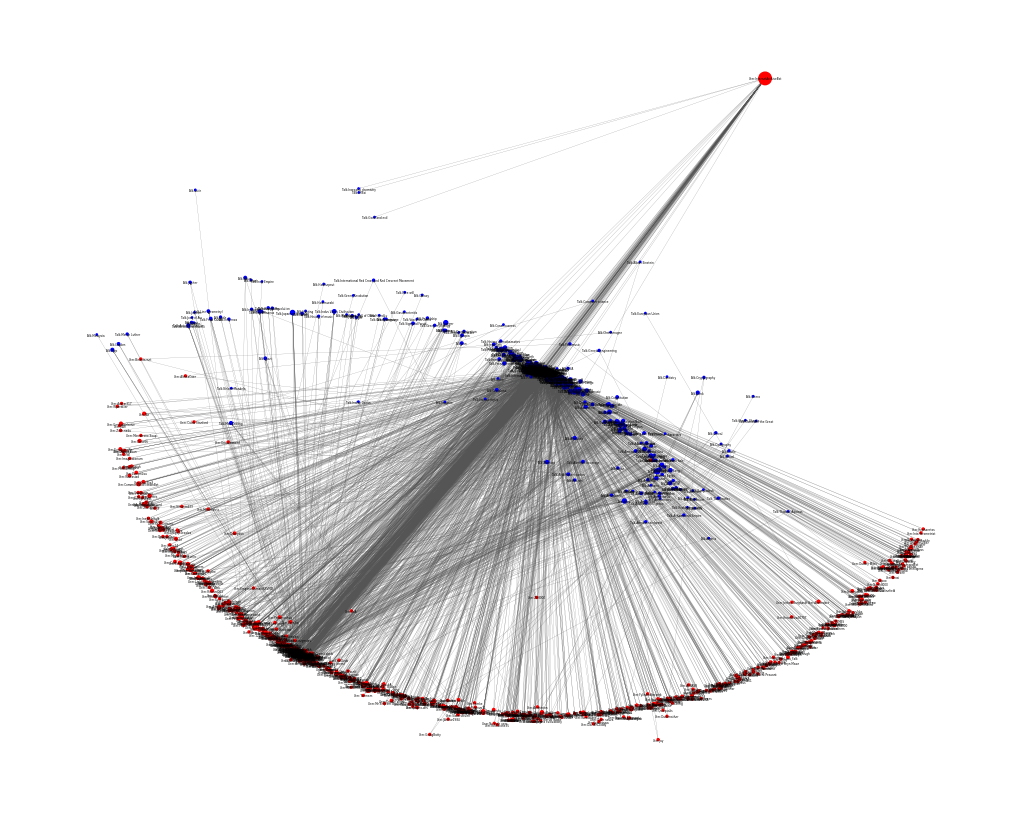

In [25]:
graph = page_graph.copy()

# Remove users with only one connection
for node in page_graph.nodes(data=True):
    if node[1]["page_class"] == "user":
        if page_graph.out_degree(node[0]) <= 1:
            graph.remove_node(node[0])

# Remove outliers
cc = nx.weakly_connected_components(graph)
largest_c = max(cc, key=lambda x: len(x))
rsubgraph = nx.subgraph(graph, largest_c)

# Positions (currently unused)
pos = nx.nx_agraph.graphviz_layout(rsubgraph, prog="neato")

# Color and size according to coast and degree
color_talk = "#0000FF"
color_user = "#FF0000"
node_colors = [color_talk if node[1]["page_class"] == "talk" else color_user for node in rsubgraph.nodes(data=True)]
node_sizes = [rsubgraph.degree(node) for node in rsubgraph.nodes]

nx.draw_kamada_kawai(rsubgraph, with_labels=True, font_weight='light', font_size=2, node_size=node_sizes, width=.1, edge_color="#555555", arrowsize=2, node_color=node_colors)